# Simple linear regression with OLS and gradient descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. generate datapoints for regression
True underlying model: Y = 100+20X+$\epsilon$

In [21]:
np.random.seed(0)
data_len = 100000
X = np.random.uniform(-100, 100, data_len)
epsilon = 300*np.random.normal(size = data_len)
Y = 100 + 20*X + epsilon

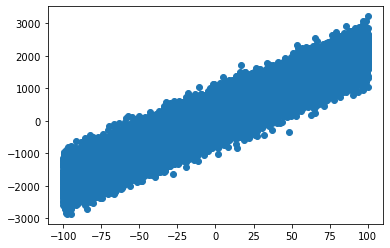

In [22]:
plt.scatter(X, Y)

### 2. Recover parameters using OLS
OLS minimizes sum of squared residuals, which has a unique solution:
$$\vec{\beta} = (X'X)^{-1}X'Y$$

In [23]:
# add the ones to the X matrix
ones = np.ones(data_len)
X = np.column_stack((ones, X))

In [24]:
X

array([[  1.        ,   9.76270079],
       [  1.        ,  43.03787327],
       [  1.        ,  20.55267521],
       ...,
       [  1.        ,  62.02656744],
       [  1.        ,  10.20645555],
       [  1.        , -54.84882876]])

In [25]:
Xt_X = X.T.dot(X)
Xt_X

array([[ 1.00000000e+05, -9.99933977e+03],
       [-9.99933977e+03,  3.34168690e+08]])

In [26]:
Xt_X_inv = np.linalg.inv(Xt_X) 
Xt_X_inv

array([[1.00000299e-05, 2.99231196e-10],
       [2.99231196e-10, 2.99250954e-09]])

In [27]:
beta = Xt_X_inv.dot(X.T).dot(Y)
beta

array([103.13337944,  20.01222525])

In [30]:
print(f"OLS recovered model from this random dataset: Y = {beta[0]:.1f}+{beta[1]:.1f}X")

OLS recovered model from this random dataset: Y = 103.1+20.0X


### 3. Use statsmodel package

In [33]:
import statsmodels.api as sm 
X = sm.add_constant(X)
reg = sm.OLS(Y,X).fit()
print(reg.summary2())

                   Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.937       
Dependent Variable: y                AIC:                1424149.2243
Date:               2020-12-12 13:22 BIC:                1424168.2501
No. Observations:   100000           Log-Likelihood:     -7.1207e+05 
Df Model:           1                F-statistic:        1.493e+06   
Df Residuals:       99998            Prob (F-statistic): 0.00        
R-squared:          0.937            Scale:              89643.      
-----------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|     [0.025     0.975] 
-----------------------------------------------------------------------
const    103.1334     0.9468    108.9280   0.0000   101.2777   104.9891
x1        20.0122     0.0164   1221.8514   0.0000    19.9801    20.0443
---------------------------------------------------------------------
Omnibus:                0.457

In [34]:
print(reg.params)

[103.13337944  20.01222525]


### 4. Recover parameters using gradient descent
* Loss function: let's use the sum of squared residuals again, denoted as L
$$ \mathrm{L} = \sum_{i}(y_i - (\beta_0 + \beta_1 * x_i))^2$$

* Initialize parameters with first guesses: $\beta_0 = 0,\ \beta_1=0$

* Calculate partial derivatives of the loss function with respect to $\beta_0$ and $\beta_1$:
$$\frac{\partial L}{\partial \beta_1} = \sum_{i}(-2x_i)(y_i-\beta_0-\beta_1*x_i)$$
$$\frac{\partial L}{\partial \beta_0} = \sum_{i}(-2)(y_i-\beta_0-\beta_1*x_i)$$

* Update $\beta_0$ and $\beta_1$ using learning rate $\alpha$
$$\beta_1 = \beta_1 - \alpha\frac{\partial L}{\partial \beta_1}$$
$$\beta_0 = \beta_0 - \alpha\frac{\partial L}{\partial \beta_0}$$
* Repeat this process to shrink the loss L

In [89]:
X = np.random.uniform(-100, 100, data_len)
epsilon = 300*np.random.normal(size = data_len)
Y = 100 + 20*X + epsilon
beta1, beta0 = 0, 0
alpha = 0.000000002 # learning rate
epochs = 100000
# gradient descent
for i in range(epochs):
    Y_pred = beta1*X+beta0
    D_1 = sum(-2*X*(Y-Y_pred)) # partial L partial beta_1
    D_0 = sum(-2*(Y-Y_pred)) # partial L partial beta_0
    beta1 -= alpha*D_1 # use learning rate to update beta1
    beta0 -= alpha*D_0 # use learning rate to update beta0
    if i%500 == 0:
        print(f"iter {i} beta1 {beta1} beta0 {beta0}")
print(beta1, beta0)
    

iter 0 beta1 26.589196793147103 beta0 0.03842246495738132
iter 500 beta1 19.998611967875174 beta0 17.996033321677647
iter 1000 beta1 19.99928206056476 beta0 32.69766768196017
iter 1500 beta1 19.99983066486447 beta0 44.73388289233428
iter 2000 beta1 20.000279806725487 beta0 54.5879217726522
iter 2500 beta1 20.000647518774826 beta0 62.65541479746317
iter 3000 beta1 20.00094856430846 beta0 69.26026429073754
iter 3500 beta1 20.00119503002391 beta0 74.66764880221412
iter 4000 beta1 20.00139681128989 beta0 79.09466977895697
iter 4500 beta1 20.00156200943611 beta0 82.71906798606175
iter 5000 beta1 20.001697257014136 beta0 85.68635963267346
iter 5500 beta1 20.001807984088142 beta0 88.11567871212563
iter 6000 beta1 20.001898636246924 beta0 90.1045601207089
iter 6500 beta1 20.00197285309014 beta0 91.73285559282948
iter 7000 beta1 20.00203361435486 beta0 93.0659396737033
iter 7500 beta1 20.00208335954922 beta0 94.15733444640077
iter 8000 beta1 20.002124085896394 beta0 95.05085839358544
iter 8500 

iter 69500 beta1 20.002307993586605 beta0 99.08573843265297
iter 70000 beta1 20.002307993586605 beta0 99.08573843266718
iter 70500 beta1 20.002307993586605 beta0 99.0857384326814
iter 71000 beta1 20.00230799358661 beta0 99.08573843268948
iter 71500 beta1 20.00230799358661 beta0 99.08573843269659
iter 72000 beta1 20.00230799358661 beta0 99.08573843270369
iter 72500 beta1 20.00230799358661 beta0 99.0857384327108
iter 73000 beta1 20.00230799358661 beta0 99.0857384327179
iter 73500 beta1 20.00230799358661 beta0 99.0857384327189
iter 74000 beta1 20.00230799358661 beta0 99.0857384327189
iter 74500 beta1 20.00230799358661 beta0 99.0857384327189
iter 75000 beta1 20.00230799358661 beta0 99.0857384327189
iter 75500 beta1 20.00230799358661 beta0 99.0857384327189
iter 76000 beta1 20.00230799358661 beta0 99.0857384327189
iter 76500 beta1 20.00230799358661 beta0 99.0857384327189
iter 77000 beta1 20.00230799358661 beta0 99.0857384327189
iter 77500 beta1 20.00230799358661 beta0 99.0857384327189
iter 7